In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
def query_ps1(ra,dec,radius,only_stars=False,version='dr2'):
    if (version.lower() != 'dr2') & (version.lower() != 'dr1'):
        m = 'Version must be dr2, or dr1'
        raise ValueError(m)

    str = f'https://catalogs.mast.stsci.edu/api/v0.1/panstarrs/{version.lower()}/mean?ra={ra}&dec={dec}&radius={radius}&nDetections.gte=5&pagesize=-1&format=csv'
    try:
        cat = pd.read_csv(str)
    except pd.errors.EmptyDataError:
        print('No detections')
        cat = []
    cat = isolate_stars(cat,only_stars=only_stars)
    cat = cut_bad_detections(cat)
    return cat 

def isolate_stars(cat,only_stars=False,Qf_lim=0.85,psfkron_diff=0.05):
    qf_ind = ((cat.gQfPerfect.values > Qf_lim) & (cat.rQfPerfect.values > Qf_lim) & 
              (cat.iQfPerfect.values > Qf_lim) & (cat.zQfPerfect.values > Qf_lim))
    kron_ind = (cat.rMeanPSFMag.values - cat.rMeanKronMag.values) < psfkron_diff
    ind = qf_ind & kron_ind
    if only_stars:
        cat = cat.iloc[ind]
        cat.loc[:,'star'] = 1
    else:
        cat.loc[:,'star'] = 0
        cat.loc[ind,'star'] = 1
    return cat 

def cut_bad_detections(cat):
    ind = (cat.rMeanPSFMag.values > 0) & (cat.iMeanPSFMag.values > 0) & (cat.zMeanPSFMag.values > 0)
    return cat.iloc[ind]

In [11]:
sne_ra = 299.618917 
sne_dec = 62.137731

targ_ra=299.6106875
targ_dec=62.1349666667

In [4]:
df = pd.read_csv('../../Data/PS-09_09_2025.csv')

In [5]:
df

,objName,objID,projectionID,skyCellID,raMean,decMean,raMeanErr,decMeanErr,gPSFMag,gPSFMagErr,...,zKronMag,zKronMagErr,zpsfQfPerfect,yPSFMag,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,ypsfQfPerfect
0,PSO J299.5865+61.9725,182362995863547691,2491,50,299.586459,61.972503,0.00100,0.00100,25.113501,0.894720,...,-999.000000,-999.000000,0.997260,21.802601,0.339801,22.577299,0.012021,-999.000000,-999.000000,0.998074
1,PSO J299.5882+61.9732,182362995881658617,2491,50,299.588176,61.973218,0.13901,0.13901,-999.000000,0.524218,...,-999.000000,-999.000000,0.998815,-999.000000,0.264970,-999.000000,0.005003,-999.000000,-999.000000,0.997003
2,PSO J299.6134+61.9729,182362996134158137,2491,50,299.613400,61.972882,0.02985,0.05457,22.163401,0.068209,...,21.428301,0.120658,0.998135,22.045601,0.382817,23.160299,0.015723,-999.000000,-999.000000,0.997097
3,PSO J299.6180+61.9719,182362996180117047,2491,50,299.618012,61.971931,0.00100,0.00100,24.426399,0.507916,...,-999.000000,-999.000000,0.997706,23.820601,2.212590,-999.000000,0.039094,-999.000000,-999.000000,0.996650
4,PSO J299.6335+61.9740,182362996335379509,2491,50,299.633538,61.973983,0.00100,0.00100,-999.000000,0.437697,...,-999.000000,-999.000000,0.998784,22.516800,0.620828,21.746401,0.008199,-999.000000,-999.000000,0.998222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PSO J299.4001+62.1374,182562994001145625,2491,51,299.400129,62.137397,0.00169,0.00696,19.440599,0.008702,...,18.446199,0.009219,0.997178,18.237301,0.013923,18.254000,0.001642,18.406200,0.021560,0.996121
9996,PSO J299.4023+62.1362,182562994022664150,2491,51,299.402285,62.136162,0.00232,0.00544,16.718201,0.001503,...,16.028500,0.001480,0.997524,15.938500,0.002252,15.930100,0.000525,16.057301,0.003195,0.995943
9997,PSO J299.4023+62.1362,182562994022664150,2491,51,299.402285,62.136162,0.00232,0.00544,16.712700,0.001569,...,16.030100,0.001444,0.997688,15.916700,0.002288,15.910800,0.000558,16.039000,0.003185,0.995993
9998,PSO J299.4035+62.1397,182562994033358337,2491,51,299.403485,62.139673,0.01399,0.01914,24.070601,0.427122,...,19.995100,0.038092,0.998556,19.475401,0.035490,19.578800,0.002817,19.714399,0.056788,0.996792


In [8]:
mask = ((df['iPSFMag'] - df['iKronMag']) < 0.05)&(df['iPSFMag'] > 0)&(df['iKronMag'] > 0)&(df['rPSFMag'] > 0)&(df['rKronMag'] > 0)&(df['gPSFMag'] > 0)&(df['gKronMag'] > 0)

In [17]:
targ_df = df[(np.abs(df['raMean'] - targ_ra) < 4/3600) & (np.abs(df['decMean'] - targ_dec) < 4/3600)]

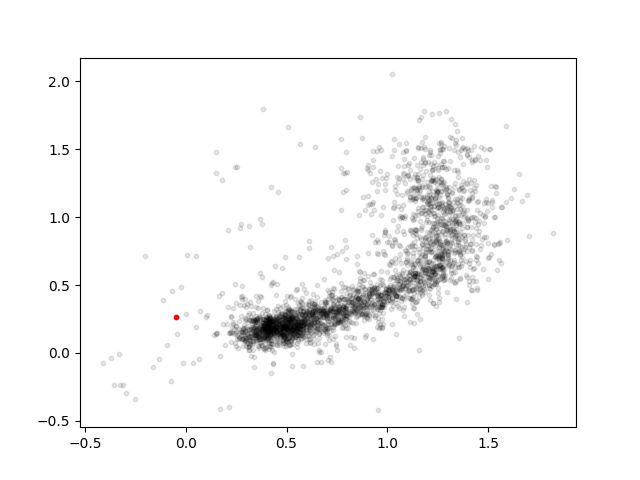

In [20]:
plt.figure()
plt.scatter(df['gPSFMag'][mask] - df['rPSFMag'][mask], df['rPSFMag'][mask] - df['iPSFMag'][mask], s=10, color='k', alpha=0.1)
plt.scatter(targ_df['gPSFMag'] - targ_df['rPSFMag'], targ_df['rPSFMag'] - targ_df['iPSFMag'], s=10, color='r', alpha=1)
plt.show()


In [16]:
targ_df#[((targ_df['iPSFMag'] - targ_df['iKronMag']) < 0.05)]

,objName,objID,projectionID,skyCellID,raMean,decMean,raMeanErr,decMeanErr,gPSFMag,gPSFMagErr,...,zKronMag,zKronMagErr,zpsfQfPerfect,yPSFMag,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,ypsfQfPerfect
3166,PSO J299.6107+62.1350,182562996106752735,2491,50,299.610685,62.134975,0.01505,0.0148,13.6486,0.000335,...,13.2808,0.000411,0.785222,13.1015,0.000447,13.0814,0.000152,13.1354,0.000476,0.99576


In [28]:
# mu = m - M
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
d_L = cosmo.luminosity_distance(0.019).value

d_L

mu = 5*np.log10(d_L) + 25
m = 18.812

In [29]:
m - mu

-15.771911774902225